In [1]:
import pandas as pd
import torch
from math import sqrt
from sklearn import tree
from sklearn import svm
from torch.autograd import Variable
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#### Reprocecing

In [17]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0
                  )
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state = 25)
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#
a = pd.concat([Xtest,Ytest],axis = 1)
a = a.sort_values('BackDistance').reset_index(drop = True)
Xtest = a.iloc[:,data.columns != "BackDistance"]
Ytest = a.iloc[:,data.columns == "BackDistance"]



In [24]:
bar

18.565485714285714

## Function that plot and statistical performance metrics
#### You know

In [19]:
def regression_visilize(Xtrain, Xtest, Ytrain, Ytest,f,name,preprocecing = True,plotf = True):
    xigma = 1
    bar = 0
    if preprocecing == True:
        scalarX = StandardScaler()
        scalarX.fit(Xtrain)
        scalarX.mean_
        scalarX.var_
        Xtrain = scalarX.transform(Xtrain)
        Xtest = scalarX.transform(Xtest)
        scalarY = StandardScaler()
        scalarY.fit(Ytrain)
        Ytrain = scalarY.transform(Ytrain)
        Ytest = scalarY.transform(Ytest)
        #Ytest = Ytest.values
        bar = scalarY.mean_[0]
        xigma = sqrt(scalarY.var_[0])
    else:
        Ytest = Ytest.values
    import warnings
    warnings.filterwarnings("ignore")
    clf = f.fit(Xtrain, Ytrain)
    clf = clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    y_pred = y_pred*xigma+bar
    y_true = Ytest*xigma+bar
    y_true = y_true.ravel()
    #print('y_pred_shape:',y_pred.shape,'y_true.shape:',y_true.shape)
    EVS = explained_variance_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    RMSE = sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_true, y_pred)
    print('EVS:',EVS,'\n','RMSE:',RMSE,'\n', 'MAE:',MAE,'\n','R2:',R2)
    y_1 = y_pred
    #xx = Xtest.iloc[:,0][:, np.newaxis]
    if plotf == True:
        #plt.rcParams['figure.figsize']=(10,4)
        font1={'family' : 'Times New Roman','weight': 'normal','size': 14}
        #plt.rcParams['font'] = font1
        fig, ax = plt.subplots(figsize = (5, 3))
        plt.scatter(np.arange(300),y_true, s=10, edgecolor="black",c="blue", label="Actuality")
        ax.plot(y_pred, label='Prediction',c = 'r')
        #ax.plot(y_true)
        ax.legend(fontsize=13,prop=font1)
        plt.yticks(fontsize = 16,family = 'Times New Roman')
        plt.xticks(np.linspace(0,300,7),fontsize = 16,family = 'Times New Roman')
        ax.set_xlabel('Number of test data sets (Sorted)',fontsize = 16,family = 'Times New Roman')
        ax.set_ylabel('Distance/(m)',fontsize = 16,family = 'Times New Roman')
        plt.title(name,fontsize = 17,family = 'Times New Roman')
        fig.show
        a = y_pred - y_true
        save_filename = name+'_regression.svg'
        plt.savefig(save_filename, bbox_inches='tight')
    #print(Xtest.values[136])
    return a

## CART

EVS: 0.9859243947799387 
 RMSE: 0.7989127518325122 
 MAE: 0.6569153403374837 
 R2: 0.9859152381598508


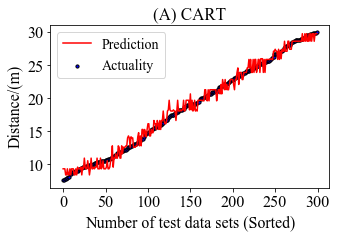

In [22]:
clf = DecisionTreeRegressor( presort = True
                                 ,random_state=25
                                 ,max_depth=5
                                 ,criterion="mse"
                                )
CART_error = regression_visilize(Xtrain=Xtrain, Xtest=Xtest
                    , Ytrain=Ytrain, Ytest=Ytest,f=clf,name='(A) CART',preprocecing = True)

## RF

EVS: 0.9931852147836209 
 RMSE: 0.5562439253968283 
 MAE: 0.42014581196581224 
 R2: 0.9931721909978595


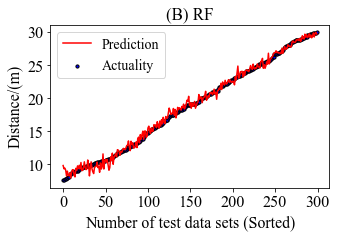

In [23]:
rfc = RandomForestRegressor(n_estimators=39
                             ,random_state=90
                            )
RF_error = regression_visilize(Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain
                    , Ytest=Ytest,f=rfc,name='(B) RF',preprocecing = False)


In [5]:
print(np.where(RF_error==np.min(RF_error)))
#print(np.where(a==np.max(a,axis=0)))


(array([136], dtype=int64),)


## SVM

EVS: 0.9869229367675155 
 RMSE: 0.7720821823255002 
 MAE: 0.5689931605551376 
 R2: 0.9868453934860119


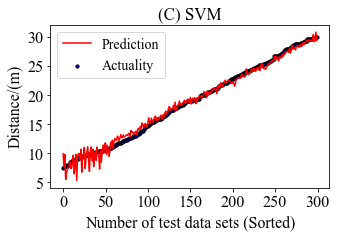

In [24]:
svr = svm.SVR(
    C=1
    , cache_size=2000
    , coef0=0.0, degree=1
    , kernel= 'poly'
             ).fit(Xtrain,Ytrain)
svm_error = regression_visilize(Xtrain=Xtrain, Xtest=Xtest
                    , Ytrain=Ytrain, Ytest=Ytest,f=svr,name='(C) SVM',preprocecing = True)

In [100]:
svm_error.shape

(300,)

## ANN

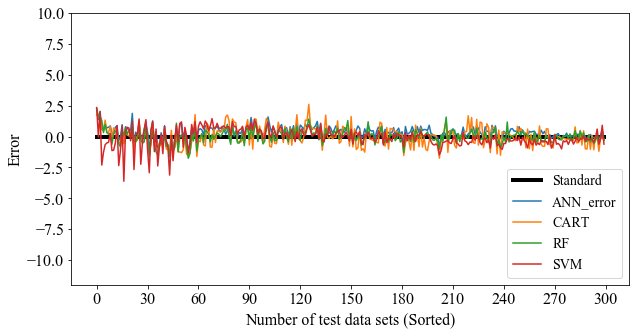

In [25]:

ANN_error = np.loadtxt('ANN_error.txt')
font1={'family' : 'Times New Roman','weight': 'normal','size': 14}
#plt.rcParams['font'] = font1
fig, ax = plt.subplots(figsize = (10, 5))
#plt.scatter(np.arange(300),y_true, s=10, edgecolor="black",c="blue", label="Actuality")
ax.plot(np.arange(300),np.zeros(300), label='Standard',linewidth=4,c = 'black'
       )
ax.plot(np.arange(300),ANN_error, label='ANN_error'
       )
ax.plot(np.arange(300),CART_error, label='CART')
ax.plot(np.arange(300),RF_error, label='RF')
ax.plot(np.arange(300),svm_error, label='SVM')
#ax.plot(y_true)
ax.legend(fontsize=13,prop=font1,loc=4)
plt.yticks(fontsize = 16,family = 'Times New Roman')
plt.xticks(np.linspace(0,300,11),fontsize = 16,family = 'Times New Roman')
plt.xticks(np.linspace(0,300,11),fontsize = 16,family = 'Times New Roman')
plt.ylim(-12, 10)
ax.set_xlabel('Number of test data sets (Sorted)',fontsize = 16,family = 'Times New Roman')
ax.set_ylabel('Error',fontsize = 16,family = 'Times New Roman')
#plt.title('Error',fontsize = 17,family = 'Times New Roman')
fig.show
plt.savefig('ERROR_REGRESSION.svg', bbox_inches='tight')

In [3]:
import torch
import sys
print(torch.__version__)
print(sys.version)

1.4.0+cpu
3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
